# Kuramoto Model of the Uncinate Circuit

## Introduction

### Deep brain stimulation (DBS) for Depression


### Computational Modeling in Human Subject Electrophysiology


## Kuramoto Basics

### Structure

Kuramoto globally-coupled oscillators are a good starting point for modeling oscillatory behavior in brain networks. In our case here, we will be doing topologically-coupled oscillator models, where the topology of the network is informed by structural priors on the network. Let's get started...

In [8]:
%matplotlib inline
import networkx as nx
import numpy as nm
import scipy.signal as sig
import matplotlib.pyplot as plt

We have to make sure we have the right *libraries* to do what we want to do. Key here is the networkx library. We will build around this library so that we have its in-built tools readily available to us. See my overview of **programming** to get a better idea of modular design, libraries, and the importance of respecting programming culture in scientific inquiry.

In [5]:
class KModel:
    G = nx.Graph()
    phase = nm.array([]) 
    states = nm.array([])
    timestep = 0    
    
    def __init__(self,nodes=6,edge_factor=0.2):
        self.G = nx.gnm_random_graph(nodes,nodes*nodes * edge_factor)
        
        #if states are oscillatory
        self.phase = nm.random.uniform(-nm.pi/2,nm.pi/2,[nodes,1])
        self.intrinsic_freq = nm.random.normal(0.5,0.1,[nodes,1])
        self.states = nm.sin(self.phase)        
        
    def give_graph(self):
        return self.G
        
    def give_states(self):
        return self.phase
        
    def state_blip(self,node):
        self.states[node] = -nm.pi/2
        
    def step_time(self):
        self.timestep += 1
        self.propagate_state()
        
        
    def propagate_state(self):
        self.phase -= self.intrinsic_freq + 1/6* nx.laplacian_matrix(self.G) * nm.sin(self.phase)
        self.phase = ( self.phase + nm.pi ) % (2 * nm.pi) - nm.pi        
        
        self.states = nm.hstack((self.states,nm.sin(self.phase)))

    def give_state_course(self):
        return self.states

Here, we've set up a simple KModel class. This will be the foundation of our Kuramoto Model. Classes are powerful entities that take functions, variables, and "information", package them into a self-contained object, and deliver to any other script a clean product that can plug into other code via a stereotyped, explicitly outlined **API**.

But, what can we actually **do** with this?

In [16]:

def main():
    n_nodes = 6
    UC = KModel(n_nodes,0.2)
    t = range(1,1000)
    #state_raster = numpy.zeros([n_nodes,1])

    for ts in t:
        #if ts % 10 == 0:
        #    UC.state_blip(3)
        UC.step_time()
        #state_raster = nm.hstack((state_raster,UC.give_states()))
    
    plt.figure()
    nx.draw(UC.give_graph())
    
    plt.figure()
    plt.plot(UC.give_states())

    plt.figure()
    plt.plot(UC.give_state_course().T)   
    plt.xlim((0,10))
    plt.xlabel('Time (seconds)')
    plt.ylabel('Phase Value')
    
    plt.show()
    
    #print(UC.give_states())

Our main function is heart of our program. The **python interpreter** looks through scripts in order to see what instructions it needs to run. But it's simple minded, so it always looks for, and starts at, a *main()* function. This is where we do what we want to do.

We make a call to KModel, and initialize it. This calls __init__ and we let the machinary we designed above do its thing.

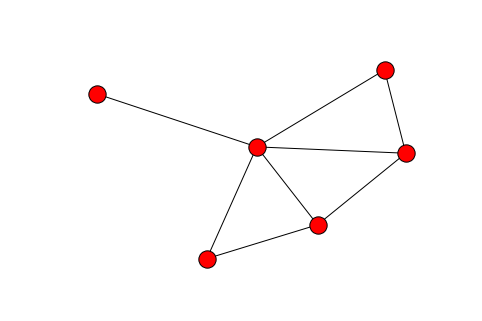

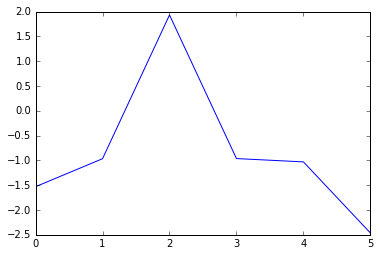

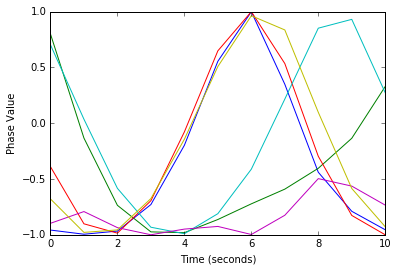

In [17]:
main()